In [16]:
import nltk
nltk.download('twitter_samples') #need to import my words here
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('universal_tagset')

from nltk.tokenize import TweetTokenizer
TKNZR = TweetTokenizer()
import sys  
!{sys.executable} -m pip install contractions

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\ajpar\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ajpar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ajpar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ajpar\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ajpar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\ajpar\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tag

You should consider upgrading via the 'C:\Users\ajpar\anaconda3\python.exe -m pip install --upgrade pip' command.


In [17]:
!pip install pyenchant

You should consider upgrading via the 'c:\users\ajpar\anaconda3\python.exe -m pip install --upgrade pip' command.


In [206]:
!pip install --upgrade numpy

In [40]:
#This cell is used to get the tweets from file and turn them into strings, stored in a list
import json
#next step: store these data files, and figure out how to get the rest of the jsnons in quickly. 
#Note: Current unpacked files: 01:15,16; 10:08,09; 27:22,23

def JSON_Parser(filepath, tweet_list):
    # a a list of dictionaries. 
    f = open( filepath ,)
    data = [json.loads(line) for line in f]
    
    #print(data[555])
    i=-1
    #this mess parses the raw json data. It first checks that the language is english. 
    #If the tweet is a retweet, it simply accesses the original tweet
    #if the tweet is extended, it accesses only the full version. It works in the case it is both too.
    #still has ads, replies to other users and the like. 
    #currently stores a list of strings. 
    for x in data :
        i=i+1
        if ('lang' in x) & ('text' in x) :
            if (x['lang'] == 'en'):
                if('retweeted_status' in x):
                    if 'extended_tweet' in x['retweeted_status']:
                        tweet_list.append(x['retweeted_status']['extended_tweet']['full_text'])
                        if (x['retweeted_status']['extended_tweet']['full_text'] == "The cowardice of Schultz is breathtaking. He’s a Republican. He should run in the Republican primary. If he can’t convince the people on his OWN TEAM that he’s a better option than Trump, how the hell would he convince the entire country? He knows he can’t. Gaslightissimo!"):
                            print("yes")
                    else:
                        tweet_list.append(x['retweeted_status']['text'])
                        if (x['retweeted_status']['text'] == "The cowardice of Schultz is breathtaking. He’s a Republican. He should run in the Republican primary. If he can’t convince the people on his OWN TEAM that he’s a better option than Trump, how the hell would he convince the entire country? He knows he can’t. Gaslightissimo!"):
                            print("yes")
                else:
                    if('extended_tweet' in x):
                        tweet_list.append(x['extended_tweet']['full_text'])
                    else:
                        tweet_list.append(x['text'])

    #print(data[1])
    f.close()
    return(tweet_list)

# Opening JSON file
#this needs to be the file editing section. 
# Import Module
import os

def JSON_Importer(folder_path):
    #Call this one preferably
    #can use this file path "F:\archiveteam-twitter-stream-2019-02\Extracted\twitter_stream_2019_02_01\01\15"
    #going to copy this six times for all different folder paths I want. 
    # Folder Path
    path = folder_path

    # Change the directory
    os.chdir(path) 
    master_list = []
    # iterate through all file
    for file in os.listdir():
        # Check whether file is in text format or not
        if file.endswith(".json"):
            file_path = f"{path}\{file}"
            JSON_Parser(file_path, master_list)    
    return(master_list)


In [49]:
tweet_list = []
f = r'F:\archiveteam-twitter-stream-2019-02\Extracted\twitter_stream_2019_02_01\01\15\25.json'
tweet_list =JSON_Parser(f, tweet_list)
h = Twitter_Tokenizer(tweet_list[42],True,True)
print(h)

['I', 'kinda', 'believe', 'my', 'friend', 'probably', 'did', 'hit', 'me', 'up', 'cause', 'he', 'wanted', 'to', 'see', 'how', 'I', 'was', 'doing', 'but', 'I', 'also', 'know', 'him', 'so', 'idk', '.', 'We', 'will', 'see', 'lol']


In [99]:
#tweet_list = []
#f = r'F:\archiveteam-twitter-stream-2019-02\Extracted\twitter_stream_2019_02_01\01\15\25.json'
#JSON_Parser(f, tweet_list)

In [5]:
#PreProcessing
#the goal of this box is to clean up text prior to tokenization. 
#complete, probably need to check if text is ready. Also no foreign language detection support. 
import contractions
from textsearch import TextSearch
import pkg_resources
from symspellpy import SymSpell, Verbosity
import csv
import re
import string
import unidecode
from unidecode import unidecode
# contracted text expander. Takes list of text. single tweet
#probably could combine this w/abbreviation for efficancy. Not choke point though. 
def Contraction_Expander(text):
    f=text
    #text = TextSearch(f, replace_foreign_chars=True)
    
    fixed_text = unidecode(f) #these decodes special chars. Could change to remove it
    #for foreign text
    expanded_words = []    
    for word in fixed_text.split():
      # using contractions.fix to expand the shotened words
      expanded_words.append(contractions.fix(word))   

    expanded_text = ' '.join(expanded_words)
    return(expanded_text)


#this is from https://medium.com/nerd-stuff/python-script-to-turn-text-message-abbreviations-into-actual-phrases-d5db6f489222
#takes text to abbreviate, and references a text file of know abbreviations. 
#File has been expanded on my own. 
def Abbreviation_Expander(text):
    text = text.split(" ")
    j = 0
    for _str in text:
        # File path which consists of Abbreviations.
        fileName = r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\Twitter_Slang.txt"
        # File Access mode [Read Mode]
        accessMode = "r"
        with open(fileName, accessMode) as myCSVfile:
            # Reading file as CSV with delimiter as "=", so that abbreviation are stored in row[0] and phrases in row[1]
            dataFromFile = csv.reader(myCSVfile, delimiter="=")
            # Removing Special Characters.
            _str = re.sub('[^a-zA-Z0-9-_ ]', '', _str)
            for row in dataFromFile:
                # Check if selected word matches short forms[LHS] in text file.
                if _str.upper() == row[0]:
                    # If match found replace it with its appropriate phrase in text file.
                    text[j] = row[1]
            myCSVfile.close()
        j = j + 1
    # Replacing commas with spaces for final output.
    return(' '.join(text))


#idea for foreign language: remove any tweets with foreign charecters. 


#these 2 are all from symspellpy: https://symspellpy.readthedocs.io/en/latest/index.html
#they both take forever. Not sure its worth doing. 
def Spell_Checker_Full(text):
    #this should take a whole sentence
    sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)
    dictionary_path = pkg_resources.resource_filename(
        "symspellpy", "frequency_dictionary_en_82_765.txt")
    bigram_path = pkg_resources.resource_filename(
        "symspellpy", "frequency_bigramdictionary_en_243_342.txt")
    
    # term_index is the column of the term and count_index is the
    # column of the term frequency
    sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)
    sym_spell.load_bigram_dictionary(bigram_path, term_index=0, count_index=2)

    # lookup suggestions for multi-word input strings (supports compound
    # splitting & merging)
    input_term = (text)
    # max edit distance per lookup (per single word, not per whole input string)
    suggestions = sym_spell.lookup_compound(input_term, max_edit_distance=2)
    # display suggestion term, edit distance, and term frequency
    for suggestion in suggestions:
        return(suggestion.term)

def Spell_Checker(text):
    #this does one word. Could be used to check "candidate" misspellings
    sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)
    dictionary_path = pkg_resources.resource_filename(
    "symspellpy", "frequency_dictionary_en_82_765.txt")
    # term_index is the column of the term and count_index is the
    # column of the term frequency
    sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)
    # lookup suggestions for single-word input strings
    #should work
    input_term = text  # misspelling of "apostrophe"
    # max edit distance per lookup
    # (max_edit_distance_lookup <= max_dictionary_edit_distance)
    suggestions = sym_spell.lookup(input_term, Verbosity.CLOSEST,
                                   max_edit_distance=2, include_unknown=True)
    # display suggestion term, term frequency, and edit distance
    for suggestion in suggestions:
        return(suggestion.term) #convert to actual string

    
    

In [6]:
#this box handles tokenizing, stemming, noise removal, and synonym creation? the like. 
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import wordnet
from nltk import FreqDist
from nltk.tokenize import TweetTokenizer
from nltk.tag import pos_tag
import re, string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer


def Twitter_Tokenizer(text, remove_handles,shorten):
    TTokenizer=TweetTokenizer(strip_handles=remove_handles, reduce_len=shorten)
    return(TTokenizer.tokenize(text))


#maybe use synset, and if something is already in the database and in a synset, change it to that?
#or change to first alphabetical in set for quick and dirty? Make sure to add itself. 
#Could do itteratively to try to converge to alphabeticly first. 
#removes synonyms using wordnet (TO DO)

#https://stackoverflow.com/questions/38233145/nltk-most-common-synonym-wordnet-for-each-word

#takes tokenized tweet LIST, returns full LIST with spelling errors replaced
#Only changes alphabetical tokens that have suggustions under enchant. 
#seems to be around 2 hours per 100k. Takes first enchant word.
#need to work out what to do if first word is actually two words. hmm. 
#not working, need to assess issues with when suggested word is multiple words. 
def Enchant_Spell_Check(tweet_list):
    d = enchant.Dict("en_US")
    short_spell = []
    spellchecked = []
    dumword = []
    for element in tweet_list :
        for word in element :
            if (d.check(word) == False) & (len(word)>1) & (word.isalpha() == True):
                #print(word)
                dummy = d.suggest(word)
                if len(dummy)>0:
                    for wordspelled in dummy[0].split(" "):
                        dumword.append(wordspelled)
                    #print(dumword)
                else:
                    dumword.append(word)
            else:
                dumword.append(word)
                for thing in dumword:
                    short_spell.append(thing)
                dumword = []
        spellchecked.append(short_spell)
        short_spell = []
    return spellchecked


def position_tagger(list_of_tweets): #takes tokens. Used for synonym changing. 
    tagged_tweets = []
    for tweet in list_of_tweets:
        tagged_tweets.append(nltk.pos_tag(tweet,tagset='universal'))
    return(tagged_tweets)
            
#takes a list of tokens. Used for the freq list
def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token
            

#requires a position tagged list of tokens, and a frequency list. so therefore call like this
#pos_tagged = position_tagger(tokenized)   (tokenized tweets)
#all_pos_words = get_all_words(pos_tagged)
#freq = nltk.FreqDist(all_pos_words) #gets the freq list
#then call function
#Note: Apparently wordnet does nothave all english words. best I can do though
def token_synonym_removal(pos_tagged, freq):
    updated_tokens = []
    updated_tweet=[]
    for tweet in pos_tagged:
        for token in tweet : #this should do one tweet
            h = set()
            #print(token[0])
            most_used = token[0]
            #print(token[1])
            if(token[1] == 'NOUN' or 'VERB' or 'ADJ' or 'ADV'):
                if token[1] == 'VERB' :
                    pos = wordnet.VERB
                elif token[1] == 'NOUN' :
                    pos = wordnet.NOUN
                elif token[1] == 'ADJ' :
                    pos = wordnet.ADJ
                else :
                    pos = wordnet.ADV
                for ss in wordnet.synsets(token[0], pos):#can use the tag for the thing at the end
                    for word in ss.lemma_names():
                        h.add(word.lower())
                #print(h)
                for word in h:
                    #print(freq[word,token[1]])
                    if freq[word,token[1]] > freq[most_used, token[1]]:
                        most_used = word
            updated_tweet.append(most_used)
        updated_tokens.append(updated_tweet)
        updated_tweet = []
    return(updated_tokens)

#https://www.digitalocean.com/community/tutorials/how-to-perform-sentiment-analysis-in-python-3-using-the-natural-language-toolkit-nltk
#tokenizes. Takes text string, and a bool that determines if you want to keep @ mentions, 
#takes another bool to deside if you want to shorten strings of the same charecter 
#in a row to 3. (heyyyy -> heyyy)
#returns list of list of strings. Each sublist=tweet. Each string is a token


#note this is not stemming. Lemmatizing normalizes all words, stemming removes the end of verbs
#if this is to slow, stemming is faster. 
#this takes a single token, so you need to call in a for loop
def Lemmatize_Remove_Noise(tweet_tokens, remove_stopwords, remove_punct):
    stop_words = stopwords.words('english') #can edit or add to this to remove other stopwords. 
    cleaned_tokens = []
        
    for token, tag in pos_tag(tweet_tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)
        if((remove_stopwords == True) and (remove_punct == True)):
            if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
                cleaned_tokens.append(token.lower())

        elif((remove_stopwords == True) and (remove_punct == False)):
            if len(token) > 0 and token.lower() not in stop_words:
                cleaned_tokens.append(token.lower())

        elif((remove_stopwords == False) and (remove_punct == True)):
            if len(token) > 0 and token not in string.punctuation:
                cleaned_tokens.append(token.lower())
        else:
            if len(token) > 0:
                cleaned_tokens.append(token.lower())
    #print(cleaned_tokens)       
    return cleaned_tokens



In [7]:
from string import digits
import nltk
from nltk.corpus import wordnet
from nltk import FreqDist
#for post processing work (after tweets are tokens)
#Call in order written down. 
#Look like I need to move synonyms to earlier in code. 
#Therefore this is done for now. 

#deletes hashtags(the whole token). Call first if wanted. 
def token_hashtag_deleter(tokens):
    tokens2=[]
    for i, token in enumerate(tokens):
        if "#" not in token:
            tokens2.append(token)
    return(tokens2)

#removes all punctuation from tokens.  
def token_punctuation_remover(tokens):
    for i, token in enumerate(tokens):
        tokens[i] = re.sub(r'[^\w\s]', '', token)
    return(tokens)

#removes all numbers from tokens. 
def token_number_remover(tokens):
    for i, token in enumerate(tokens):  
        tokens[i]=''.join(filter(lambda x: not x.isdigit(), token))
    return(tokens)

#removes tokens that are empty, or just a space. 
def empty_token_remover(tokens):
    tokens2 = []
    for i, token in enumerate(tokens):
            if ((token != '') and (token != ' ') and (token != "''")):
                tokens2.append(token)
    return(tokens2)


#removes duplicate tokens
def duplicate_token_remover(tokens):
    hold = set(tokens)
    tokens2 = list(hold)
    return(tokens2)

In [67]:
#dedicated to trying to keep a record of what the original line number of the tweet was. 

#first gonna read in first 5000 words
from unidecode import unidecode
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import wordnet
from nltk import FreqDist
from nltk.tokenize import TweetTokenizer
from nltk.tag import pos_tag
import re, string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import time
import statistics
import numpy as np
from scipy import stats
import enchant
import matplotlib.pyplot as plt
preprocessed_tweets = []
processed_tweets1 = []
processed_tweets2 = []
processed_tweets3 = []
processed_tweets4 = []
post_processed_tweets = []
short_preprocessed_tweets = []
post_processed_tweets2 = []
final_processed_tweets = []
d = enchant.Dict("en_US")

f = open(r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\Full_Tweet_List.txt", "r")
f2 = open(r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\LineLenTesting\Contraction_Abbrev.txt", "a")
f3 = open(r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\LineLenTesting\Lemmatized.txt", "a")



for line in f:
    preprocessed_tweets.append(line)

f.close()

short_processed_tweets = []

for iterator in range(2110):
    short_preprocessed_tweets.append(preprocessed_tweets[iterator])

for x in short_preprocessed_tweets:
    y = Contraction_Expander(x)
    z = Abbreviation_Expander(y)
    processed_tweets1.append(z)
print(len(processed_tweets1))


for w in processed_tweets1:
    f2.write(w + "\n" )

for w in processed_tweets1 :
    h = Twitter_Tokenizer(w,True,True)
    processed_tweets2.append(h)
print(len(processed_tweets2))




spellchecked = Enchant_Spell_Check(processed_tweets2)
print(len(spellchecked))

pos_tagged = position_tagger(spellchecked)
all_pos_words = get_all_words(pos_tagged)
freq = nltk.FreqDist(all_pos_words)
processed_tweets3 = token_synonym_removal(pos_tagged,freq)

print(len(processed_tweets3))

for h in processed_tweets3:
    processed_tweets4.append(Lemmatize_Remove_Noise(h, True, True))
print(processed_tweets4[10])
print(len(processed_tweets4))
#for y in processed_tweets4:
   # for n in y :
      #  if y.index(n) != len(y)-1 :
       #     f3.write(n + "," )
       # if y.index(n) == len(y)-1:
        #    f3.write(n + "\n" )
print(processed_tweets2[129])
print(processed_tweets3[129])
print(processed_tweets4[129])
#the new, better way to write to file USE ONLY THIS
with open(r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\LineLenTesting\Lemmatized.txt", 'w') as file:
    for wordList in processed_tweets4:
        count = 1
        word_row = ''
        for word in wordList:
            if count < len(wordList):
                word_row += word+','
            else:
                word_row += word
            #print(len(wordList))
            #print(count)
            count+=1
        file.write(word_row + '\n') ##write whole list of words then iterate to next list
file.close()
f2.close()

#read in to check
f3.close()
f3 = open(r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\LineLenTesting\Lemmatized.txt", "r")
post_processed_tweets = f3.readlines()
for test in post_processed_tweets :
    test2 = test.strip('\n')
    post_processed_tweets2.append(test2.split(","))
    
print(post_processed_tweets2[129])
print(post_processed_tweets2[90])
for token in post_processed_tweets2:
    w1 = token_hashtag_deleter(token)
    x1 = token_punctuation_remover(w1) 
    y1 = token_number_remover(x1)
    z1 = empty_token_remover(y1)
    a1 = duplicate_token_remover(z1)
    if(a1 != []):
        final_processed_tweets.append(a1)
f3.close()

print(str(len(final_processed_tweets)))
print(final_processed_tweets[90])
print(final_processed_tweets[129])

2110
2110
2110
2110
['new', 'trailer', 'deadly', 'year', 'think', ':d', '#deadlydays', '#pixelsplit', '#indiegame', '#indiedev', '#gamedev', '#indiegaming', '#roguelite', '#roguelike']
2110
['What', 'if', '?', 'https://t.co/wHeFnrIZM0']
['What', 'if', '?', 'https://t.co/wHeFnrIZM0']
[]
['']
['wear', 'sex', 'photo', 'history', '..', 'get', 'kid', '..']
2091
['get', 'sex', 'wear', 'kid', 'photo', 'history']
['want']


In [102]:
#running and writing all the final tweet lists to file. 
#this was for testing. Not the real driver. Thats below

brek.brak(ob)
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import wordnet
from nltk import FreqDist
from nltk.tokenize import TweetTokenizer
from nltk.tag import pos_tag
import re, string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import time
import statistics
import numpy as np
from scipy import stats
import enchant
import matplotlib.pyplot as plt
from unidecode import unidecode

tweet_list_short = []
short_preprocessed_tweets=[]
processed_tweets1 = []
tokenized = []
lemmatized = []

#importing vars
tweet_list = JSON_Importer(r"F:\archiveteam-twitter-stream-2019-02\Extracted\twitter_stream_2019_02_01\01\15")
tweet_list.extend(JSON_Importer(r"F:\archiveteam-twitter-stream-2019-02\Extracted\twitter_stream_2019_02_01\01\16"))
tweet_list.extend(JSON_Importer(r"F:\archiveteam-twitter-stream-2019-02\Extracted\twitter_stream_2019_02_10\10\08"))
tweet_list.extend(JSON_Importer(r"F:\archiveteam-twitter-stream-2019-02\Extracted\twitter_stream_2019_02_10\10\09"))
tweet_list.extend(JSON_Importer(r"F:\archiveteam-twitter-stream-2019-02\Extracted\twitter_stream_2019_02_27\27\22"))
tweet_list.extend(JSON_Importer(r"F:\archiveteam-twitter-stream-2019-02\Extracted\twitter_stream_2019_02_27\27\23"))

print("done")

for iterator in range(7500):
    tweet_list_short.append(tweet_list[iterator])
#Write to tweet list file 
#remember to switch to long version.
tweet_list2 = list(dict.fromkeys(tweet_list)) #https://stackoverflow.com/questions/480214/how-do-you-remove-duplicates-from-a-list-whilst-preserving-order
with open(r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\Final_Tweet_Lists\Full_Tweet_List.txt", 'w',encoding="utf-8") as file:
    for tweet in tweet_list2:
        tweet2 = tweet.replace("\n", " ")
        tweet3 = " ".join(tweet2.splitlines())
        file.write( tweet3 + "\n")

file.close()

print(len(tweet_list2))



done
207150


In [41]:
#Test cases. 
#passed all I could think of. 
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import wordnet
from nltk import FreqDist
from nltk.tokenize import TweetTokenizer
from nltk.tag import pos_tag
import re, string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import time
import statistics
import numpy as np
from scipy import stats
import enchant
import matplotlib.pyplot as plt


short_preprocessed_tweets=[]
tokenized = []
lemmatized = []
processed_tweets1 = []
post = []

test = "How much money do u need. I have 35$. ()(()()())()( \n)"
#test = "Hello what is this new world"
short_preprocessed_tweets.append(test)
test = "l \n \t ddd655, 43g* yeet yaw thsis is a test"
#test = "Haters gonna hate get rekt kid"
short_preprocessed_tweets.append(test)


test = "t \t \e\ t\s\ tgsd \s\d]g\\\\\\\\$%$#@%$%# #$ %WW# #%Y| _ RT+ $W #} }[ ]gdrg LG Penis"
short_preprocessed_tweets.append(test)

test = "h"
short_preprocessed_tweets.append(test)

test = ""
short_preprocessed_tweets.append(test)


#print(short_preprocessed_tweets)
for x in short_preprocessed_tweets:
    y = Contraction_Expander(x)
    z = Abbreviation_Expander(y)
    processed_tweets1.append(z)


for w in processed_tweets1 :
    h = Twitter_Tokenizer(w,True,True)
    tokenized.append(h)


spellchecked = Enchant_Spell_Check(tokenized)

#spell checked syns
pos_tagged = position_tagger(spellchecked)
all_pos_words = get_all_words(pos_tagged)
freq = nltk.FreqDist(all_pos_words)
spell_syn = token_synonym_removal(pos_tagged,freq)


for h3 in spell_syn:
    lemmatized.append(Lemmatize_Remove_Noise(h3, True, True))
    
for token in lemmatized:
    w1 = token_hashtag_deleter(token)
    x1 = token_punctuation_remover(w1) 
    y1 = token_number_remover(x1)
    z1 = empty_token_remover(y1)
    a1 = duplicate_token_remover(z1)
    if(a1 != []):
        post.append(a1)
        
print(post)

with open(r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\Final_Tweet_Lists\Processed_Test_1.txt", 'w') as post1:
    for wordList in post:
        count = 1
        word_row = ''
        for word in wordList:
            if count < len(wordList):
                word_row += word+','
            else:
                word_row += word
            #print(len(wordList))
            #print(count)
            count+=1
        post1.write(word_row + '\n') ##write whole list of words then iterate to next list
post1.close()


tweet_list = JSON_Importer(r"F:\archiveteam-twitter-stream-2019-02\Extracted\twitter_stream_2019_02_01\01\15")
tweet_list.extend(JSON_Importer(r"F:\archiveteam-twitter-stream-2019-02\Extracted\twitter_stream_2019_02_01\01\16"))
tweet_list.extend(JSON_Importer(r"F:\archiveteam-twitter-stream-2019-02\Extracted\twitter_stream_2019_02_10\10\08"))
tweet_list.extend(JSON_Importer(r"F:\archiveteam-twitter-stream-2019-02\Extracted\twitter_stream_2019_02_10\10\09"))
tweet_list.extend(JSON_Importer(r"F:\archiveteam-twitter-stream-2019-02\Extracted\twitter_stream_2019_02_27\27\22"))
tweet_list.extend(JSON_Importer(r"F:\archiveteam-twitter-stream-2019-02\Extracted\twitter_stream_2019_02_27\27\23"))

print("done")

[['money', 'much', 'need'], ['l', 'yaw', 'test', 'yet', 'g', 'dds'], ['w', 'rt', 'darg', 'lg', 'g', 'e', 'ww', 'penis', 'togs'], ['h']]
yes
yes
yes
done


In [23]:
#running and writing all the final tweet lists to file. 
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import wordnet
from nltk import FreqDist
from nltk.tokenize import TweetTokenizer
from nltk.tag import pos_tag
import re, string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import time
import statistics
import numpy as np
from scipy import stats
import enchant
import matplotlib.pyplot as plt

start_time = time.time()


brk.broken(breakre) # intentional break so don't re run

tweet_list_short = []
short_preprocessed_tweets=[]
tokenized = []
lemmatized = []
lemmatized_syn = []
lemmatized_syn_spell = []
post = []
post_syn=[]
post_syn_spell = []
post_count = []
post_count_syn=[]
post_count_syn_spell = []

#importing vars
tweet_list = JSON_Importer(r"F:\archiveteam-twitter-stream-2019-02\Extracted\twitter_stream_2019_02_01\01\15")
tweet_list.extend(JSON_Importer(r"F:\archiveteam-twitter-stream-2019-02\Extracted\twitter_stream_2019_02_01\01\16"))
tweet_list.extend(JSON_Importer(r"F:\archiveteam-twitter-stream-2019-02\Extracted\twitter_stream_2019_02_10\10\08"))
tweet_list.extend(JSON_Importer(r"F:\archiveteam-twitter-stream-2019-02\Extracted\twitter_stream_2019_02_10\10\09"))
tweet_list.extend(JSON_Importer(r"F:\archiveteam-twitter-stream-2019-02\Extracted\twitter_stream_2019_02_27\27\22"))
tweet_list.extend(JSON_Importer(r"F:\archiveteam-twitter-stream-2019-02\Extracted\twitter_stream_2019_02_27\27\23"))

print("done")

for iterator in range(500):
    tweet_list_short.append(tweet_list[iterator])
#Write to tweet list file 
#remember to switch to long version.
tweet_list2 = list(dict.fromkeys(tweet_list))
with open(r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\Final_Tweet_Lists\Full_Tweet_List.txt", 'w',encoding="utf-8") as file:
    for tweet in tweet_list2:
        tweet2 = tweet.replace("\n", " ")
        tweet3 = " ".join(tweet2.splitlines())
        file.write( tweet3 + "\n")

file.close()

for x in tweet_list2:
    y = Contraction_Expander(x)
    z = Abbreviation_Expander(y)
    processed_tweets1.append(z)


for w in processed_tweets1 :
    h = Twitter_Tokenizer(w,True,True)
    tokenized.append(h)


spellchecked = Enchant_Spell_Check(tokenized)

#spell checked syns
pos_tagged = position_tagger(spellchecked)
all_pos_words = get_all_words(pos_tagged)
freq = nltk.FreqDist(all_pos_words)
spell_syn = token_synonym_removal(pos_tagged,freq)

#non spell checked
pos_tagged = position_tagger(tokenized)
all_pos_words = get_all_words(pos_tagged)
freq = nltk.FreqDist(all_pos_words)
syn_tokens = token_synonym_removal(pos_tagged,freq)





for h1 in tokenized:
    lemmatized.append(Lemmatize_Remove_Noise(h1, True, True))

for h2 in syn_tokens:
    lemmatized_syn.append(Lemmatize_Remove_Noise(h2, True, True))
    
for h3 in spell_syn:
    lemmatized_syn_spell.append(Lemmatize_Remove_Noise(h3, True, True))
    
#writing to processed file
with open(r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\Final_Tweet_Lists\Processed_Tweet_List.txt", 'w') as file1:
    for wordList in lemmatized:
        count = 1
        word_row = ''
        for word in wordList:
            if count < len(wordList):
                word_row += word+','
            else:
                word_row += word
            #print(len(wordList))
            #print(count)
            count+=1
        file1.write(word_row + '\n') ##write whole list of words then iterate to next list
file1.close()



#writing to syn file

with open(r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\Final_Tweet_Lists\Processed_Tweet_List_Syn.txt", 'w') as file2:
    for wordList in lemmatized_syn:
        count = 1
        word_row = ''
        for word in wordList:
            if count < len(wordList):
                word_row += word+','
            else:
                word_row += word
            #print(len(wordList))
            #print(count)
            count+=1
        file2.write(word_row + '\n') ##write whole list of words then iterate to next list
file2.close()

#writing to syn spell file

with open(r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\Final_Tweet_Lists\Processed_Tweet_List_Syn_Spell.txt", 'w') as file3:
    for wordList in lemmatized_syn_spell:
        count = 1
        word_row = ''
        for word in wordList:
            if count < len(wordList):
                word_row += word+','
            else:
                word_row += word
            #print(len(wordList))
            #print(count)
            count+=1
        file3.write(word_row + '\n') ##write whole list of words then iterate to next list
file3.close()


#now for post processing. 

#lemmatized
for token in lemmatized:
    w1 = token_hashtag_deleter(token)
    x1 = token_punctuation_remover(w1) 
    y1 = token_number_remover(x1)
    z1 = empty_token_remover(y1)
    a1 = duplicate_token_remover(z1)
    if(a1 != []):
        post.append(a1)
        
#lemmatized syn
for token in lemmatized_syn:
    w1 = token_hashtag_deleter(token)
    x1 = token_punctuation_remover(w1) 
    y1 = token_number_remover(x1)
    z1 = empty_token_remover(y1)
    a1 = duplicate_token_remover(z1)
    if(a1 != []):
        post_syn.append(a1)


#lemmatized syn spell
for token in lemmatized_syn_spell:
    w1 = token_hashtag_deleter(token)
    x1 = token_punctuation_remover(w1) 
    y1 = token_number_remover(x1)
    z1 = empty_token_remover(y1)
    a1 = duplicate_token_remover(z1)
    if(a1 != []):
        post_syn_spell.append(a1)
        
        
# add original line numbers


#lemmatized
lem_count = 1
for token in lemmatized:
    w1 = token_hashtag_deleter(token)
    x1 = token_punctuation_remover(w1) 
    y1 = token_number_remover(x1)
    z1 = empty_token_remover(y1)
    a1 = duplicate_token_remover(z1)
    if(a1 != []):
        a1.insert((len(a1)), str(lem_count))
        post_count.append(a1)
    lem_count += 1
        

#lemmatized syn
lem_count = 1
for token in lemmatized_syn:
    w1 = token_hashtag_deleter(token)
    x1 = token_punctuation_remover(w1) 
    y1 = token_number_remover(x1)
    z1 = empty_token_remover(y1)
    a1 = duplicate_token_remover(z1)
    if(a1 != []):
        a1.insert((len(a1)), str(lem_count))
        post_count_syn.append(a1)
    lem_count += 1



#lemmatized syn spell
lem_count = 1
for token in lemmatized_syn_spell:
    w1 = token_hashtag_deleter(token)
    x1 = token_punctuation_remover(w1) 
    y1 = token_number_remover(x1)
    z1 = empty_token_remover(y1)
    a1 = duplicate_token_remover(z1)
    if(a1 != []):
        a1.insert((len(a1)), str(lem_count))
        post_count_syn_spell.append(a1)
    lem_count += 1
    
#writing all to respective files. 
#post1
with open(r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\Final_Tweet_Lists\Post_Processed_Tweet_List.txt", 'w') as post1:
    for wordList in post:
        count = 1
        word_row = ''
        for word in wordList:
            if count < len(wordList):
                word_row += word+','
            else:
                word_row += word
            #print(len(wordList))
            #print(count)
            count+=1
        post1.write(word_row + '\n') ##write whole list of words then iterate to next list
post1.close()

#post with syn
with open(r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\Final_Tweet_Lists\Post_Processed_Tweet_List_Syn.txt", 'w') as post2:
    for wordList in post_syn:
        count = 1
        word_row = ''
        for word in wordList:
            if count < len(wordList):
                word_row += word+','
            else:
                word_row += word
            #print(len(wordList))
            #print(count)
            count+=1
        post2.write(word_row + '\n') ##write whole list of words then iterate to next list
post2.close()

#post with syn and spell
with open(r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\Final_Tweet_Lists\Post_Processed_Tweet_List_Syn_Spell.txt", 'w') as post3:
    for wordList in post_syn_spell:
        count = 1
        word_row = ''
        for word in wordList:
            if count < len(wordList):
                word_row += word+','
            else:
                word_row += word
            #print(len(wordList))
            #print(count)
            count+=1
        post3.write(word_row + '\n') ##write whole list of words then iterate to next list
post3.close()


#now with original index
#post with index 
with open(r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\Final_Tweet_Lists\Post_Processed_Tweet_List_Line_Num.txt", 'w') as post4:
    for wordList in post_count:
        count = 1
        word_row = ''
        for word in wordList:
            if count < len(wordList):
                word_row += word+','
            else:
                word_row += word
            #print(len(wordList))
            #print(count)
            count+=1
        post4.write(word_row + '\n') ##write whole list of words then iterate to next list
post4.close()

#post with index and syn
with open(r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\Final_Tweet_Lists\Post_Processed_Tweet_List_Line_Num_Syn.txt", 'w') as post5:
    for wordList in post_count_syn:
        count = 1
        word_row = ''
        for word in wordList:
            if count < len(wordList):
                word_row += word+','
            else:
                word_row += word
            #print(len(wordList))
            #print(count)
            count+=1
        post5.write(word_row + '\n') ##write whole list of words then iterate to next list
post5.close()

#post with index syn and spell
with open(r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\Final_Tweet_Lists\Post_Processed_Tweet_List_Line_Num_Syn_Spell.txt", 'w') as post6:
    for wordList in post_count_syn_spell:
        count = 1
        word_row = ''
        for word in wordList:
            if count < len(wordList):
                word_row += word+','
            else:
                word_row += word
            #print(len(wordList))
            #print(count)
            count+=1
        post6.write(word_row + '\n') ##write whole list of words then iterate to next list
post6.close()

print("--- %s seconds ---" % (time.time() - start_time))


NameError: name 'brk' is not defined

In [38]:
import re, string
test = []
x = "What are we doign"

test.append(x.split(" "))

print(test)

[['What', 'are', 'we', 'doign']]


In [60]:
#this is now for writing spellchecked syns to file for future processing. Probably gonna take 8 or 9 hrs. 
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import wordnet
from nltk import FreqDist
from nltk.tokenize import TweetTokenizer
from nltk.tag import pos_tag
import re, string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import time
import statistics
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
d = enchant.Dict("en_US")
preprocessed_tweets = []
short_preprocessed_tweets = []
processed_tweets=[]
short_spell = []
spellchecked = []
write_to = []
dumword = " "


pre = open(r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\Full_Tweet_List.txt", "r")
r2x = open(r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\Full_Tweet_List_Processed_Spellchecked_Syn.txt","a")
preprocessed_tweets = pre.readlines()
pre.close()
post.close()
start_time = time.time()
for iterator in range(250):
    short_preprocessed_tweets.append(preprocessed_tweets[iterator])

for x in preprocessed_tweets:
    y = Contraction_Expander(x)
    z = Abbreviation_Expander(y)
    h = Twitter_Tokenizer(z,True,True)
    processed_tweets.append(h)
spellchecked = Enchant_Spell_Check(processed_tweets)


pos_tagged = position_tagger(spellchecked)
all_pos_words = get_all_words(pos_tagged)
freq = nltk.FreqDist(all_pos_words)
processed_tweets_2 = token_synonym_removal(pos_tagged,freq)
for h in processed_tweets_2:
    write_to.append(Lemmatize_Remove_Noise(h, True, True))

for h1 in write_to:
    for n1 in h1 :
        if h1.index(n1) != len(h1)-1 :
            r2x.write(n1 + "," )
        if h1.index(n1) == len(h1)-1 :
            r2x.write(n1 + "\n" )

r2x.close()
#print(spellchecked)
print("--- %s seconds ---" % (time.time() - start_time))

--- 18055.866739034653 seconds ---


PreProcessed Unique Words:509917
Processed Unique Words:144426
Processed Synonyms Unique Words:136354
PostProcessed Unique Words:94335
PostProcessed Synonyms Unique Words:86925


Pre-Processed
Number of Tweets265929
mean = 17.87391747421304
std = 13.677614945195682
max = 110
1st: [2.]
90th: [40.]
99th: [55.]
99.9th: [64.]


Processed
Number of Tweets252017
mean = 9.919997460488776
std = 8.420065257098406
max = 92
1st: [1.]
90th: [23.]
99th: [36.]
99.9th: [53.]


Processed Synonyms
Number of Tweets269454
mean = 9.605108849748008
std = 8.215539685517953
max = 92
1st: [1.]
90th: [22.]
99th: [35.]
99.9th: [52.]


Post-Processed
Number of Tweets251757
mean = 8.52015634123381
std = 7.002582503762694
max = 77
1st: [1.]
90th: [19.]
99th: [29.]
99.9th: [43.]


Post-Processed Synonyms
Number of Tweets269079
mean = 8.177750772078088
std = 6.727914284510092
max = 73
1st: [1.]
90th: [18.]
99th: [28.]
99.9th: [41.]


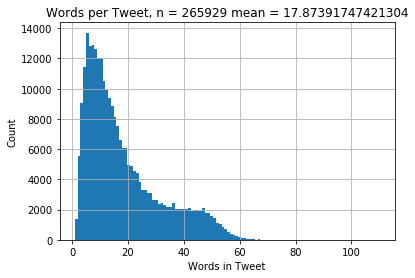

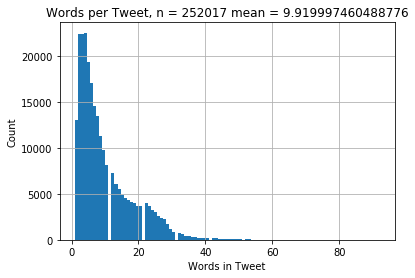

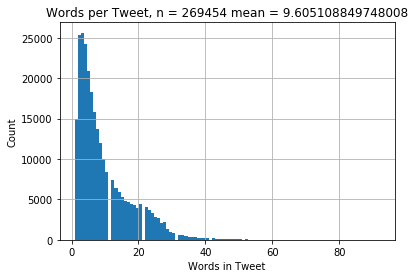

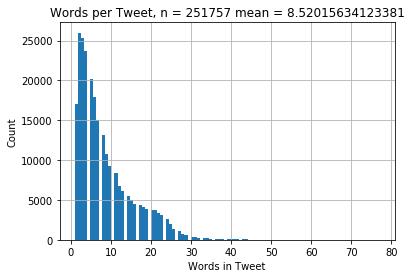

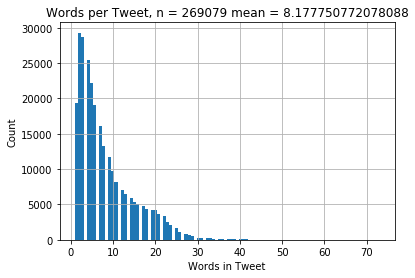

In [4]:
#reads tweets from all steps of the process and computes statistics. 

from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import wordnet
from nltk import FreqDist
from nltk.tokenize import TweetTokenizer
from nltk.tag import pos_tag
import re, string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import time
import statistics
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

preprocessed_tweets = []
processed_tweets = []
processed_tweets_syn = []
post_processed_tweets = []
post_processed_tweets_syn = []


preprocessed_tweets_set = set()
processed_tweets_set = set()
processed_tweets_syn_set = set()
post_processed_tweets_set = set()
post_processed_tweets_syn_set = set()

pre = open(r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\Full_Tweet_List.txt", "r")
pro = open(r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\Full_Tweet_List_Processed.txt", "r")
prosyn = open(r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\Full_Tweet_List_Processed_Synonym.txt", "r")
post = open(r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\Full_Tweet_List_Post_Processed.txt", "r")
postsyn = open(r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\Full_Tweet_List_Post_Processed_Synonym.txt", "r")

for line in pre:
    preprocessed_tweets.append(line)
pre.close()

processed_tweets_1 = pro.readlines()
for test in processed_tweets_1 :
    test2 = test.strip('\n')
    processed_tweets.append(test2.split(","))
pro.close()

processed_tweets_syn1 = prosyn.readlines()
for test in processed_tweets_syn1 :
    test2 = test.strip('\n')
    processed_tweets_syn.append(test2.split(","))
prosyn.close()

postprocessed_tweets1 = post.readlines()
for test in postprocessed_tweets1 :
    test2 = test.strip('\n')
    post_processed_tweets.append(test2.split(","))
post.close()

postprocessed_tweets_syn1 = postsyn.readlines()
for test in postprocessed_tweets_syn1 :
    test2 = test.strip('\n')
    post_processed_tweets_syn.append(test2.split(","))
postsyn.close()

number_list_pre = []
number_list_pro = []
number_list_pro_syn = []
number_list_post = []
number_list_post_syn = []

for x in preprocessed_tweets:
    number_list_pre.append(len(x.split()))
    for h in x.split():
        preprocessed_tweets_set.add(h)
print("PreProcessed Unique Words:" + str(len(preprocessed_tweets_set)))
#print(preprocessed_tweets_set)

for x in processed_tweets:
    number_list_pro.append(len(x))
    for h in x:
        processed_tweets_set.add(h)
print("Processed Unique Words:" + str(len(processed_tweets_set)))

for x in processed_tweets_syn:
    number_list_pro_syn.append(len(x))
    for h in x:
        processed_tweets_syn_set.add(h)
print("Processed Synonyms Unique Words:" + str(len(processed_tweets_syn_set)))

for x in post_processed_tweets:
    number_list_post.append(len(x))
    for h in x:
        post_processed_tweets_set.add(h)
print("PostProcessed Unique Words:" + str(len(post_processed_tweets_set)))

for x in post_processed_tweets_syn:
    number_list_post_syn.append(len(x))
    for h in x: 
        post_processed_tweets_syn_set.add(h)
print("PostProcessed Synonyms Unique Words:" + str(len(post_processed_tweets_syn_set)))

print('\n')
#pre
print("Pre-Processed")
print("Number of Tweets" + str(len(number_list_pre)))
print( "mean = " + str(statistics.mean(number_list_pre)))
print( "std = " + str(statistics.pstdev(number_list_pre)))
print( "max = " + str(max(number_list_pre)))

ninety = stats.scoreatpercentile(number_list_pre, [90])
ninety_nine =stats.scoreatpercentile(number_list_pre, [99])
point_nine = stats.scoreatpercentile(number_list_pre, [99.9])
print("1st: " + str(stats.scoreatpercentile(number_list_pre, [1])))
print("90th: " + str(ninety))
print("99th: " + str(ninety_nine))
print("99.9th: " + str(point_nine))

plt.figure(1)
z,y,w = plt.hist(number_list_pre, 110, density=False)
plt.title("Words per Tweet, n = " + str(len(number_list_pre)) + " mean = " + str(statistics.mean(number_list_pre)) )
plt.xlabel("Words in Tweet")
plt.ylabel("Count")
plt.grid(True)

print('\n')
#pro
print("Processed")
print("Number of Tweets" + str(len(number_list_pro)))
print( "mean = " + str(statistics.mean(number_list_pro)))
print( "std = " + str(statistics.pstdev(number_list_pro)))
print( "max = " + str(max(number_list_pro)))

ninety = stats.scoreatpercentile(number_list_pro, [90])
ninety_nine =stats.scoreatpercentile(number_list_pro, [99])
point_nine = stats.scoreatpercentile(number_list_pro, [99.9])
print("1st: " + str(stats.scoreatpercentile(number_list_pro, [1])))
print("90th: " + str(ninety))
print("99th: " + str(ninety_nine))
print("99.9th: " + str(point_nine))

plt.figure(2)
z,y,w = plt.hist(number_list_pro, 100, density=False)
plt.title("Words per Tweet, n = " + str(len(number_list_pro)) + " mean = " + str(statistics.mean(number_list_pro)) )
plt.xlabel("Words in Tweet")
plt.ylabel("Count")
plt.grid(True)

print('\n')
#prosyn
print("Processed Synonyms")
print("Number of Tweets" + str(len(number_list_pro_syn)))
print( "mean = " + str(statistics.mean(number_list_pro_syn)))
print( "std = " + str(statistics.pstdev(number_list_pro_syn)))
print( "max = " + str(max(number_list_pro_syn)))

ninety = stats.scoreatpercentile(number_list_pro_syn, [90])
ninety_nine =stats.scoreatpercentile(number_list_pro_syn, [99])
point_nine = stats.scoreatpercentile(number_list_pro_syn, [99.9])
print("1st: " + str(stats.scoreatpercentile(number_list_pro_syn, [1])))
print("90th: " + str(ninety))
print("99th: " + str(ninety_nine))
print("99.9th: " + str(point_nine))

plt.figure(3)
z,y,w = plt.hist(number_list_pro_syn, 100, density=False)
plt.title("Words per Tweet, n = " + str(len(number_list_pro_syn)) + " mean = " + str(statistics.mean(number_list_pro_syn)) )
plt.xlabel("Words in Tweet")
plt.ylabel("Count")
plt.grid(True)

print('\n')

#post
print("Post-Processed")
print("Number of Tweets" + str(len(number_list_post)))
print( "mean = " + str(statistics.mean(number_list_post)))
print( "std = " + str(statistics.pstdev(number_list_post)))
print( "max = " + str(max(number_list_post)))

ninety = stats.scoreatpercentile(number_list_post, [90])
ninety_nine =stats.scoreatpercentile(number_list_post, [99])
point_nine = stats.scoreatpercentile(number_list_post, [99.9])
print("1st: " + str(stats.scoreatpercentile(number_list_post, [1])))
print("90th: " + str(ninety))
print("99th: " + str(ninety_nine))
print("99.9th: " + str(point_nine))

plt.figure(4)
z,y,w = plt.hist(number_list_post, 100, density=False)
plt.title("Words per Tweet, n = " + str(len(number_list_post)) + " mean = " + str(statistics.mean(number_list_post)) )
plt.xlabel("Words in Tweet")
plt.ylabel("Count")
plt.grid(True)

print('\n')

#post syn
print("Post-Processed Synonyms")
print("Number of Tweets" + str(len(number_list_post_syn)))
print( "mean = " + str(statistics.mean(number_list_post_syn)))
print( "std = " + str(statistics.pstdev(number_list_post_syn)))
print( "max = " + str(max(number_list_post_syn)))

ninety = stats.scoreatpercentile(number_list_post_syn, [90])
ninety_nine =stats.scoreatpercentile(number_list_post_syn, [99])
point_nine = stats.scoreatpercentile(number_list_post_syn, [99.9])
print("1st: " + str(stats.scoreatpercentile(number_list_post_syn, [1])))
print("90th: " + str(ninety))
print("99th: " + str(ninety_nine))
print("99.9th: " + str(point_nine))

plt.figure(5)
z,y,w = plt.hist(number_list_post_syn, 100, density=False)
plt.title("Words per Tweet, n = " + str(len(number_list_post_syn)) + " mean = " + str(statistics.mean(number_list_post_syn)) )
plt.xlabel("Words in Tweet")
plt.ylabel("Count")
plt.grid(True)

In [52]:
#Designated for multiple passes of the synonym work
#this works, but there is a line to break it so I dont accidently run it
gtr.dum()

from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import wordnet
from nltk import FreqDist
from nltk.tokenize import TweetTokenizer
from nltk.tag import pos_tag
import re, string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import time


preprocessed_tweets = []
processed_tweets = []
processed_tweets_set = set()
write_to = []
short_preprocessed_tweets = []
write_to_set=set()

r1 = open(r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\Full_Tweet_List.txt", "r")

#read in
for line in r1:
    preprocessed_tweets.append(line)
r1.close()


for iterator in range(5000):
    short_preprocessed_tweets.append(preprocessed_tweets[iterator])

for x in preprocessed_tweets:
    y = Contraction_Expander(x)
    z = Abbreviation_Expander(y)
    processed_tweets.append(Twitter_Tokenizer(z,True,False))
    for words in z.split():
        processed_tweets_set.add(words)
print(len(processed_tweets_set))
start_time = time.time()
for iterator in range(1,11):
    pos_tagged = position_tagger(processed_tweets)
    all_pos_words = get_all_words(pos_tagged)
    freq = nltk.FreqDist(all_pos_words)
    processed_tweets_2 = token_synonym_removal(pos_tagged,freq)
    for h in processed_tweets_2:
        write_to.append(Lemmatize_Remove_Noise(h, True, True))
    r2x = open(r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\Full_Tweet_List_Processed_SynonymX" + str(iterator)+".txt" , "a")
    processed_tweets = processed_tweets_2
    for h1 in write_to:
        for n1 in h1 :
            if h1.index(n1) != len(h1)-1 :
                r2x.write(n1 + "," )
            if h1.index(n1) == len(h1)-1 :
                r2x.write(n1 + "\n" )
            write_to_set.add(n1)
    r2x.close()

    print(str(iterator) + "Pass: " + str(len(write_to_set)))
    write_to = []
    write_to_set=set()
    
print("--- %s seconds ---" % (time.time() - start_time))

509912
1Pass: 137952
2Pass: 137091
3Pass: 136868
4Pass: 136818
5Pass: 136804
6Pass: 136800
7Pass: 136798
8Pass: 136798
9Pass: 136798
10Pass: 136798
--- 18040.121869802475 seconds ---


In [9]:
#writing unique english synonyms to a file. Also finds number and prints it. doing for all iterations. 
#intentionallly broken
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import wordnet
from nltk import FreqDist
from nltk.tokenize import TweetTokenizer
from nltk.tag import pos_tag
import re, string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import time
import enchant

breaker.break0f()

r1 = open(r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\Full_Tweet_List_Post_Processed.txt", "r")

processed_tweets = []
processed_tweets_syn = []
processed_tweets_set = set()
processed_tweets_syn_set = set()
unique_syn_set = set()
unique_OG = 0
unique_SYN = 0
    
post_processed_tweets = []
processed_tweets_1 = r1.readlines()
for test in processed_tweets_1 :
    test2 = test.strip('\n')
    processed_tweets.append(test2.split(","))
r1.close()

for x in processed_tweets:
    for h in x:
        processed_tweets_set.add(h)

for token in processed_tweets_set :
    if d.check(token) == True :
        unique_OG +=1
print("Original Unique Words: " + str(unique_OG))


d = enchant.Dict("en_US")

for iterator in range(1,4):
    read = open(r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\Full_Tweet_List_Processed_SynonymX" + str(iterator)+".txt" , "r")
    #need to add post processing here cause I am dumb. 
    dum_processed_tweets_syn = read.readlines()
    for test1 in dum_processed_tweets_syn :
        test3 = test1.strip('\n')
        processed_tweets_syn.append(test3.split(","))
    read.close()
    
    for token in processed_tweets_syn:
        w1 = token_hashtag_deleter(token)
        x1 = token_punctuation_remover(w1) 
        y1 = token_number_remover(x1)
        z1 = empty_token_remover(y1)
        a1 = duplicate_token_remover(z1)
        post_processed_tweets.append(a1)
    
    
    #need to add post processing here cause I am dumb. 
    for x in post_processed_tweets:
        for h in x:
            processed_tweets_syn_set.add(h)

    for token in processed_tweets_syn_set :
        if d.check(token) == True :
            unique_SYN +=1
            unique_syn_set.add(token)
    write =  open(r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\Full_Tweet_List_Processed_Unique_Syn" + str(iterator)+".txt" , "a")
    for x in unique_syn_set:
        write.write(x+",")
    write.close()
    
    print(str(iterator) + " Pass Unique Words: " + str(unique_SYN))
    post_processed_tweets = []
    processed_tweets_syn = []
    processed_tweets_syn_set = set()
    unique_SYN = 0

Original Unique Words: 31036
1 Pass Unique Words: 24206
2 Pass Unique Words: 23424
3 Pass Unique Words: 23222


In [3]:
#check number of actual english words. 
#this time also post processing, because working from synonym data. 
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import wordnet
from nltk import FreqDist
from nltk.tokenize import TweetTokenizer
from nltk.tag import pos_tag
import re, string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import time
import enchant

d = enchant.Dict("en_US")

r1 = open(r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\Full_Tweet_List_Post_Processed.txt", "r")
r2 = open(r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\Full_Tweet_List_Post_Processed_Synonym.txt", "r")

processed_tweets = []
processed_tweets_syn = []
processed_tweets_set = set()
processed_tweets_syn_set = set()

unique_OG = 0
unique_SYN = 0
    

processed_tweets_1 = r1.readlines()
for test in processed_tweets_1 :
    test2 = test.strip('\n')
    processed_tweets.append(test2.split(","))
r1.close()

dum_processed_tweets_syn = r2.readlines()
for test1 in dum_processed_tweets_syn :
    test3 = test1.strip('\n')
    processed_tweets_syn.append(test3.split(","))
r2.close()



for x in processed_tweets:
    for h in x:
        processed_tweets_set.add(h)

for x in processed_tweets_syn:
    for h in x:
        processed_tweets_syn_set.add(h)

for token in processed_tweets_set :
    if d.check(token) == True :
        unique_OG +=1
            
for token in processed_tweets_syn_set :
    if d.check(token) == True :
        unique_SYN +=1
            
print(unique_OG)
print(unique_SYN)
        

31036
24196


In [6]:
#check number of actual english words. 
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import wordnet
from nltk import FreqDist
from nltk.tokenize import TweetTokenizer
from nltk.tag import pos_tag
import re, string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import time
import enchant

d = enchant.Dict("en_US")

r1 = open(r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\Full_Tweet_List_Post_Processed.txt", "r")
r2 = open(r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\Full_Tweet_List_Post_Processed_Synonym.txt", "r")

processed_tweets = []
processed_tweets_syn = []
processed_tweets_set = set()
processed_tweets_syn_set = set()

unique_OG = 0
unique_SYN = 0

processed_tweets_1 = r1.readlines()
for test in processed_tweets_1 :
    test2 = test.strip('\n')
    processed_tweets.append(test2.split(","))
r1.close()

dum_processed_tweets_syn = r2.readlines()
for test1 in dum_processed_tweets_syn :
    test3 = test1.strip('\n')
    processed_tweets_syn.append(test3.split(","))
r2.close()



for x in processed_tweets:
    for h in x:
        processed_tweets_set.add(h)

for x in processed_tweets_syn:
    for h in x:
        processed_tweets_syn_set.add(h)

for token in processed_tweets_set :
    if d.check(token) == True :
        unique_OG +=1
            
for token in processed_tweets_syn_set :
    if d.check(token) == True :
        unique_SYN +=1
            
print(unique_OG)
print(unique_SYN)
        

31036
24196


In [55]:
#writes processed tweets to file. keeping for future use. 
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import wordnet
from nltk import FreqDist
from nltk.tokenize import TweetTokenizer
from nltk.tag import pos_tag
import re, string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import time


start_time = time.time()

processed_tweets = []
processed_tweets_syn = []
post_processed_tweets = []
post_processed_tweets_syn = []
r1 = open(r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\Full_Tweet_List_Processed.txt", "r")
r2 = open(r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\Full_Tweet_List_Processed_Synonym.txt", "r")
f1 = open(r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\Full_Tweet_List_Post_Processed.txt", "a")
f2 = open(r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\Full_Tweet_List_Post_Processed_Synonym.txt", "a")

#how to read in from the processed tweets file to get proper tokens. 
processed_tweets_1 = r1.readlines()
for test in processed_tweets_1 :
    test2 = test.strip('\n')
    processed_tweets.append(test2.split(","))
r1.close()



dum_processed_tweets_syn = r2.readlines()
for test1 in dum_processed_tweets_syn :
    test3 = test1.strip('\n')
    processed_tweets_syn.append(test3.split(","))
r2.close()

#print(processed_tweets[10])
for token in processed_tweets:
    w1 = token_hashtag_deleter(token)
    x1 = token_punctuation_remover(w1) 
    y1 = token_number_remover(x1)
    z1 = empty_token_remover(y1)
    a1 = duplicate_token_remover(z1)
    post_processed_tweets.append(a1)


#print(post_processed_tweets[10])
#print(post_processed_tweets[11])

for token2 in processed_tweets_syn:
    w2 = token_hashtag_deleter(token2)
    x2 = token_punctuation_remover(w2) 
    y2 = token_number_remover(x2)
    z2 = empty_token_remover(y2)
    a2 = duplicate_token_remover(z2)
    post_processed_tweets_syn.append(a2)

#this shit works to here. 
for h1 in post_processed_tweets :
    for n1 in h1 :
        if h1.index(n1) != len(h1)-1 :
            f1.write(n1 + "," )
        if h1.index(n1) == len(h1)-1 :
            f1.write(n1 + "\n" )

for h2 in post_processed_tweets_syn :
    for n2 in h2 :
        if h2.index(n2) != len(h2)-1 :
            f2.write(n2 + "," )
        if h2.index(n2) == len(h2)-1 :
            f2.write(n2 + "\n" )
f1.close()
f2.close()


print("--- %s seconds ---" % (time.time() - start_time))








--- 37.645955085754395 seconds ---


List Done
265929
mean = 17.87391747421304
std = 13.677614945195682
max = 110
1st: [2.]
90th: [40.]
99th: [55.]
99.9th: [64.]


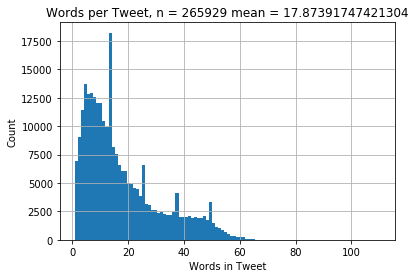

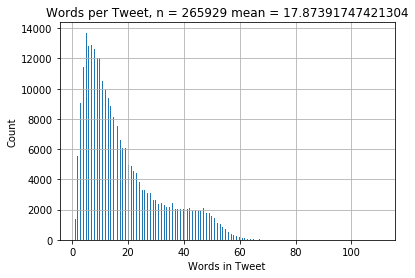

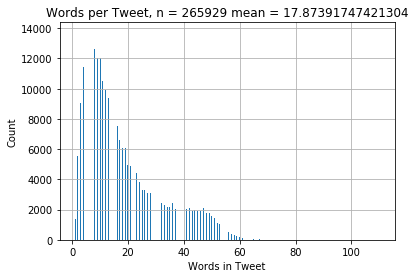

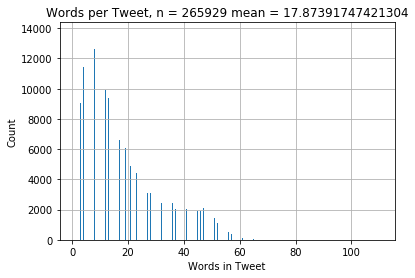

In [229]:
#This cell will handle finding the avg words/tweet
#kinda irrelivent now, but kept for refernce ewhen this process will be repeated
import re
import statistics
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
number_list = []

tweet_list = JSON_Importer(r"F:\archiveteam-twitter-stream-2019-02\Extracted\twitter_stream_2019_02_01\01\15")
tweet_list.extend(JSON_Importer(r"F:\archiveteam-twitter-stream-2019-02\Extracted\twitter_stream_2019_02_01\01\16"))
tweet_list.extend(JSON_Importer(r"F:\archiveteam-twitter-stream-2019-02\Extracted\twitter_stream_2019_02_10\10\08"))
tweet_list.extend(JSON_Importer(r"F:\archiveteam-twitter-stream-2019-02\Extracted\twitter_stream_2019_02_10\10\09"))
tweet_list.extend(JSON_Importer(r"F:\archiveteam-twitter-stream-2019-02\Extracted\twitter_stream_2019_02_27\27\22"))
tweet_list.extend(JSON_Importer(r"F:\archiveteam-twitter-stream-2019-02\Extracted\twitter_stream_2019_02_27\27\23"))

print("List Done")
#small test
#tweet_list = []
#f = r'F:\archiveteam-twitter-stream-2019-02\Extracted\twitter_stream_2019_02_01\01\15\25.json'
#tweet_list =JSON_Parser(f, tweet_list)

total_words = []

for x in tweet_list:
    x = Contraction_Expander(x)
    x = Abbreviation_Expander(x)
    #print(x)
    number_list.append(len(x.split())) 
    
    #only need to calculate once, then hopefully can just use this file to not process everything
    #each time we do statistics. Can move plotting to a different cell.
    f = open(r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\Full_Tweet_List.txt", "a")
    f.write(x + "\n" )
    f.close()

print(len(number_list))
print( "mean = " + str(statistics.mean(number_list)))
print( "std = " + str(statistics.pstdev(number_list)))
print( "max = " + str(max(number_list)))

ninety = stats.scoreatpercentile(number_list, [90])
ninety_nine =stats.scoreatpercentile(number_list, [99])
point_nine = stats.scoreatpercentile(number_list, [99.9])
print("1st: " + str(stats.scoreatpercentile(number_list, [1])))
print("90th: " + str(ninety))
print("99th: " + str(ninety_nine))
print("99.9th: " + str(point_nine))

plt.figure(1)
z,y,w = plt.hist(number_list, 100, density=False)
plt.title("Words per Tweet, n = " + str(len(number_list)) + " mean = " + str(statistics.mean(number_list)) )
plt.xlabel("Words in Tweet")
plt.ylabel("Count")
plt.grid(True)

plt.figure(2)
z,y,w = plt.hist(number_list, 300, density=False)
plt.title("Words per Tweet, n = " + str(len(number_list)) + " mean = " + str(statistics.mean(number_list)) )
plt.xlabel("Words in Tweet")
plt.ylabel("Count")
plt.grid(True)


plt.figure(3)
z,y,w = plt.hist(number_list, 400, density=False)
plt.title("Words per Tweet, n = " + str(len(number_list)) + " mean = " + str(statistics.mean(number_list)) )
plt.xlabel("Words in Tweet")
plt.ylabel("Count")
plt.grid(True)


plt.figure(4)
z,y,w = plt.hist(number_list, 800, density=False)
plt.title("Words per Tweet, n = " + str(len(number_list)) + " mean = " + str(statistics.mean(number_list)) )
plt.xlabel("Words in Tweet")
plt.ylabel("Count")
plt.grid(True)
https://www.colorado.edu/resources/portals-academic-tools
#print(tweet_list[23])
#print(number_list[23])




In [6]:
# this will read from the file to get the pre-processed text and then go through the whole 
#lemmatizing and noise removal process, then calculate word statistics. 
from nltk import FreqDist
from nltk.tag import pos_tag

preprocessed_tweets = []
preprocessed_nums = []
processed_tweets = []

f = open(r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\Full_Tweet_List.txt", "r")
x = open(r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\Tweet_Len_Pre_Processed.txt", "r")
z = open(r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\Full_Tweet_List_Processed.txt", "r")
#e = r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\Full_Tweet_List_Processed.txt"
i=0

for line in f:
    preprocessed_tweets.append(line)
for line in x:
    preprocessed_nums.append(line)
for line in z:
    l = line.strip('\n')
    l = l.split(",")
    processed_tweets.append(l)

f.close()
x.close()
z.close()


short_processed_tweets = []
print(len(processed_tweets))

for iterator in range(100):
    short_processed_tweets.append(processed_tweets[iterator])

print(len(short_processed_tweets))
#110 word str.136607
print(processed_tweets[131602])
(processed_tweets[136603]).append('#5')
(processed_tweets[136603]).append('test')
(processed_tweets[136603]).append('test')
tokens = processed_tweets[136603]
print(tokens)

w = token_hashtag_deleter(tokens)
#print(w)
x = token_punctuation_remover(w) 
print(x)
y = token_number_remover(x)
print(y)
z = empty_token_remover(y)
print(z)
a = duplicate_token_remover(z)
print(a)




#gives word densities.

freq = get_frequency_list(short_processed_tweets)
print(freq['v'])


252017
100
['late', 'photo', 'art', 'thanks', '#fashion', '#art']
['check', 'sulaimandesigne', 'product', 'label', 'packaging', 'design', 'fo', '...', '5', '#fiverr', '#5', 'test', 'test']


NameError: name 're' is not defined

In [5]:
#processing and writing to file. 
preprocessed_tweets = []
preprocessed_nums = []
postprocessed_tweets = []
open(a) # breaking so I stop running this on accident. 
postprocessed_nums = []
#using this to write to files, will need to redo at some point to add new ones
#commented out files are already used. 
#need to do this ones more after synonyms done. 

f = open(r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\Full_Tweet_List.txt", "r")
f2 = open(r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\Full_Tweet_List_Processed.txt", "a")
f3 = open(r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\Tweet_Len_Post_Process.txt", "a")
for line in f:
    #the problem here is h is a list. idk how best to write a list or token to a file. 
    #maybe write to file via csv?
    h = Twitter_Tokenizer(line,True,True) #change to keep handles/remove strings of three in a row
    y = Lemmatize_Remove_Noise(h, True, True)
    for n in y :
        if y.index(n) != len(y)-1 :
            f2.write(n + "," )
        if y.index(n) == len(y)-1 :
            f2.write(n + "\n" )
    
    f3.write(str(len(y)) + "\n")
    
f.close()
f2.close()
f3.close()


{'delete': {'status': {'id': 664115177592332289, 'id_str': '664115177592332289', 'user_id': 1720610388, 'user_id_str': '1720610388'}, 'timestamp_ms': '1549059916041'}}


In [61]:
#Driver
#tokenizing and pre processing take about an hour per 100k

import time
start_time = time.time()
#tweet_list = JSON_Importer(r"F:\archiveteam-twitter-stream-2019-02\Extracted\twitter_stream_2019_02_01\01\15")
#these next three lines are for smaler test
tweet_list = []
f = r'F:\archiveteam-twitter-stream-2019-02\Extracted\twitter_stream_2019_02_01\01\15\25.json'
tweet_list =JSON_Parser(f, tweet_list)


j = 0
tweet_tokens = []
lemmatized=[]
#lemmatized_test_2=[]
#lemmatized_test_3=[]
#lemmatized_test_4=[]
for x in tweet_list:
    x = Contraction_Expander(x)
    x = Abbreviation_Expander(x)
    h = Twitter_Tokenizer(x,True,False) #change to keep handles/remove strings of three in a row
    tweet_tokens.append(h)
    lemmatized.append(Lemmatize_Remove_Noise(h, True, True))
    #lemmatized_test_2.append(Lemmatize_Remove_Noise(h, False, True))
    #lemmatized_test_3.append(Lemmatize_Remove_Noise(h, True, False))
    #lemmatized_test_4.append(Lemmatize_Remove_Noise(h, False, False))
    
print((tweet_tokens[20]))
print(lemmatized[20])
#print(lemmatized_test_2[20])
#print(lemmatized_test_3[20])
#print(lemmatized_test_4[20])
#print("--- %s seconds ---" % (time.time() - start_time))

['These', 'announcements', 'position', 'Canada', 'as', 'a', 'competitive', 'global', 'leader', 'in', 'cleantech', 'innovation', '.', 'Sponosored', 'content', 'with', '-']
['announcement', 'position', 'canada', 'competitive', 'global', 'leader', 'cleantech', 'innovation', 'sponosored', 'content']


If you’re stalking my page heyyy bitchhhh 🤪😂


'If you are stalking my page heyyy bitchhhh 🤪😂'

In [61]:
print((Spell_Checker("diee")))

die


In [85]:
import time
start_time = time.time()
F = "My friend has a grilfriend, btw. Didn't I tell u?"
Spell_Checker_Full(Abbreviation_Expander(Contraction_Expander(F)))
print("--- %s seconds ---" % (time.time() - start_time))

--- 66.47277307510376 seconds ---


In [230]:
import time
start_time = time.time()
F = "My friend has a grilfriend, btw. Didn't I tell u?"
Abbreviation_Expander(Contraction_Expander(F))
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.04587674140930176 seconds ---
